<a href="https://www.kaggle.com/code/kifahmryan/titanic-classification?scriptVersionId=116449889" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [352]:

# Basic libraries

import numpy as np
import pandas as pd
# Image library
import matplotlib.image as image
# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.pyplot import rcParams
from mlxtend.plotting import plot_decision_regions

##Reading CVS

In [353]:
df_train= pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [354]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [355]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Out of the total passengers, 38.38% of passengers survived
* The age of passengers ranges from 0.42 to 80 years with the median at 28 years
* Median Fare was 14.5 USD. 25th and 75th quantiles are at 8 USD and 31 USD. However, the maximum fare was 512 USD indicating there are outliers in the Fare.

In [356]:
# checking duplicated values
df_train.duplicated().sum()

0

In [357]:
# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.pyplot import rcParams
from mlxtend.plotting import plot_decision_regions
# Image library
import matplotlib.image as image
# Libraries for data processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import KNN, IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Hypertuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Performance Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

# Warings
import warnings
warnings.filterwarnings('ignore')

# setting up matplotlib to use jupyter's own backend for visualisation
%matplotlib inline


In [358]:
# Extracting unique values from all columns
dict_uniques= {}

for col in df_train:
    
    if len(df_train[col].unique())< 5:
        
        dict_uniques[col]=df_train[col].unique()
                                
        
    else:
        continue
        
print(dict_uniques)

{'Survived': array([0, 1]), 'Pclass': array([3, 1, 2]), 'Sex': array(['male', 'female'], dtype=object), 'Embarked': array(['S', 'C', 'Q', nan], dtype=object)}


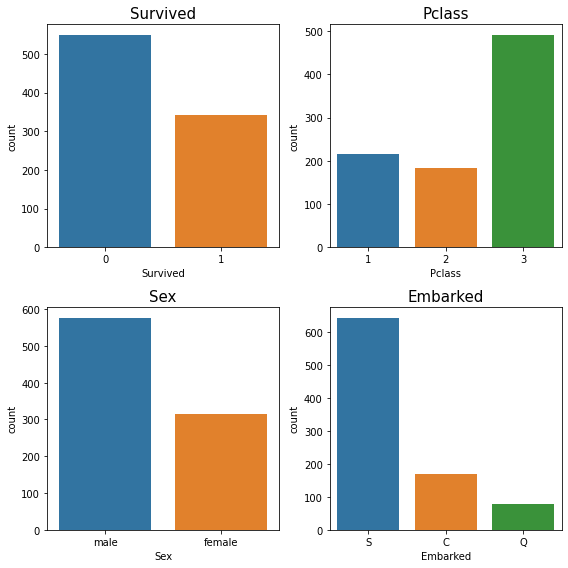

In [359]:
columns= dict_uniques.keys()

fig, ax= plt.subplots(2,2, figsize=(8,8))

for col, ax in zip(columns, ax.flatten()):
    sns.countplot(df_train[col], ax=ax)
    ax.set_title(col.title(), fontsize=15)
   
    plt.tight_layout()

* Tragically, 549 passengers i.e 62% of total passengers, lost their lives in the disaster. Only 342 passengers survived the accident
* Death rate was much higher than the survival rate.
* Maximum passengers were in class 3 which is more than double the passengers in class 1 and class 2 each
* The number of male passengers was almost twice that of female passengers
* Most of the passengers embarked on the ship at Port Southampton(S) which is almost 4 times that of port C and 9 times that of Port Q.

**#Survival analysis**

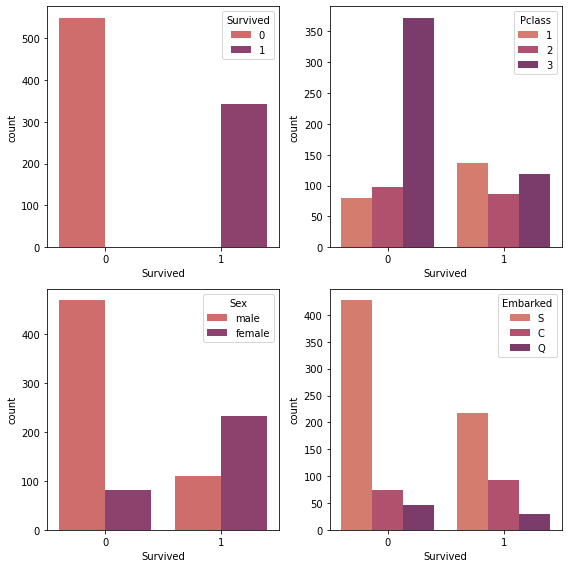

In [360]:
hue= dict_uniques.keys()
fig, ax=plt.subplots(2,2, figsize=(8,8))

for col, ax in zip(hue, ax.flatten()):
    
    sns.countplot(x='Survived', data=df_train, hue=col, ax=ax, palette='flare');

plt.tight_layout()

**#Analayzing the age effect**

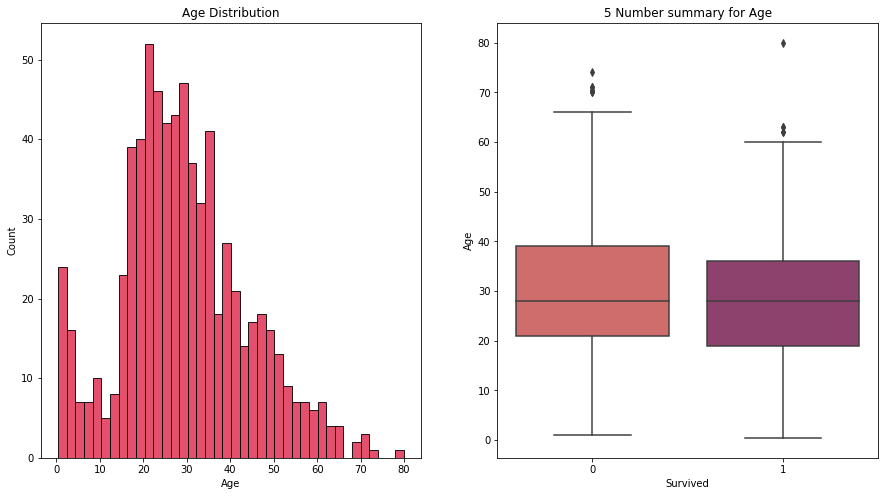

In [361]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df_train, kde=False, bins=40, color='crimson')
plt.title('Age Distribution')

plt.subplot(1,2,2);
sns.boxplot(y='Age', x='Survived', data=df_train, palette='flare')
plt.title("5 Number summary for Age");

* **From the age distibution we can see that most of passengers were of age between 18 to 40 years. Age distribution is right skewed as age is dispersed more on the right side**
* **Age is appeared to be more dispersed on the higher side for passengers who lost their lives. The median age of both dead and survived looks almost the same. There are few outliers present in the Age column**

#### Creating bins for Age

In [362]:
not_survived= df_train[df_train["Survived"]==0]

In [363]:
not_survived["age_cat"] =pd.cut(df_train["Age"],
                        bins = [0,18,36,54,72, np.Inf],
                        labels=[1,2,3,4,5])

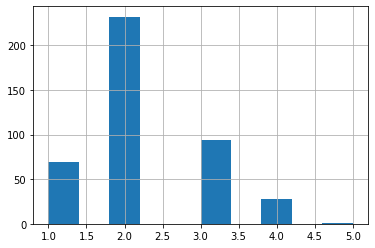

In [364]:
not_survived["age_cat"].hist();

**Fare Distribution**

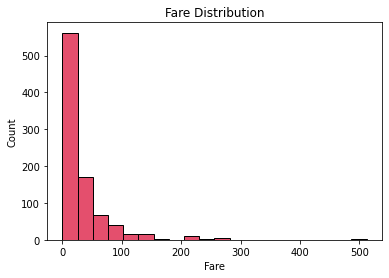

In [365]:
sns.histplot(x='Fare', data=df_train, bins=20, color='crimson')
plt.title('Fare Distribution');

In [366]:
not_survived["fare_cat"] =pd.cut(df_train["Fare"],
                        bins = [0,30,60,90,120, np.Inf],
                        labels=[1,2,3,4,5])

<AxesSubplot:>

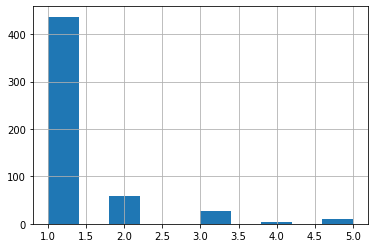

In [367]:
not_survived["fare_cat"].hist()

**The fare is not normally distributed. There are many outliers present in the data. Instead of relying on fare column, we will create bins (Classed)) to group the passengers based on the fare. First we have fitered out the passengers who lost their lives. Then we have created 5 bins for fares such as 0-30, 30-60, 60-90, 90-120 and more than 120 USD. We can see that maximum number of passengers who lost their lives, paid fare between 0 to 30 USD.**

**Fare vs Age**

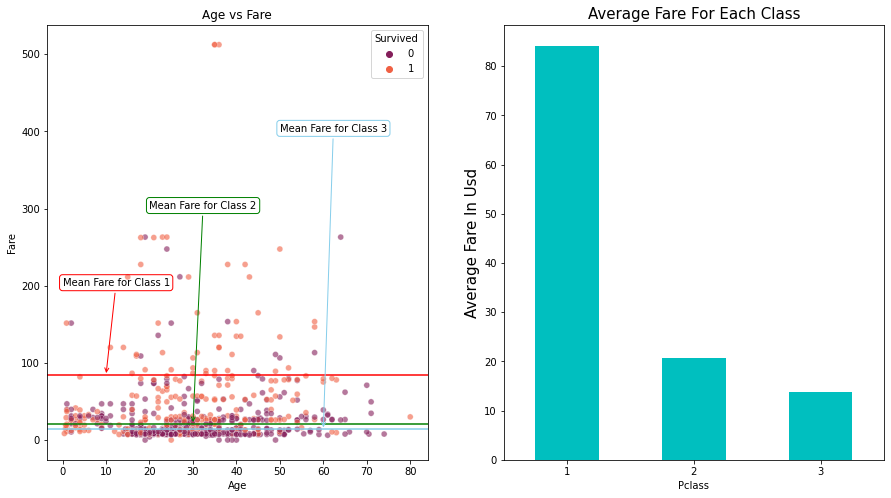

In [368]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='Age',y='Fare', data=df_train, hue='Survived',palette='rocket', alpha=0.6)
df_class= df_train.groupby('Pclass')['Fare'].mean()
plt.axhline(y=84.15, c='r', label='Class 1')
plt.axhline(y=20.66, c='g', label='Class 2')
plt.axhline(y=13.67, c='skyblue', label='Class 3')
#plt.legend(['Class 1', 'Class 2','Class3','0','1'])
plt.title('Age vs Fare')
plt.annotate('Mean Fare for Class 1', (10, 84.15), (0, 200),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="r"),
            bbox = dict(boxstyle = "round", fc ="none", ec="r"))

plt.annotate('Mean Fare for Class 2', (30, 20.66), (20, 300),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="g"),
            bbox = dict(boxstyle = "round", fc ="none", ec="g"))

plt.annotate('Mean Fare for Class 3', (60, 13.67), (50, 400),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="skyblue"),
            bbox = dict(boxstyle = "round", fc ="none", ec="skyblue"))

plt.subplot(1,2,2)
df_class= df_train.groupby('Pclass')['Fare'].mean()
df_class.plot(kind='bar', color='c')
plt.xticks(rotation=360)
plt.title('Average Fare for each class'.title(), fontsize=15)
plt.ylabel('Average Fare in USD'.title(), fontsize=15);

In [369]:
print('Relationship between Age and Fare:', df_train['Age'].corr(df_train['Fare']))
print('Relationship between Pclass and Fare:', df_train['Pclass'].corr(df_train['Fare']))

Relationship between Age and Fare: 0.0960666917690389
Relationship between Pclass and Fare: -0.5494996199439074


* Age and Fare show a weak relationship. As expected, Fare is dependent upon the class with minimal relevance to the age of the passenger
* The Scatter plot between Age and fare also shows that passengers who died also clustered around classes 2 and 3 with low fares. It supports our previous finding that class 1 passengers were prviledged and evacuated first. The average fare paid by class 1 passengers was more than that of combined class 2 and 3 passengers.****

# > **Relationship between Fare and Survival**

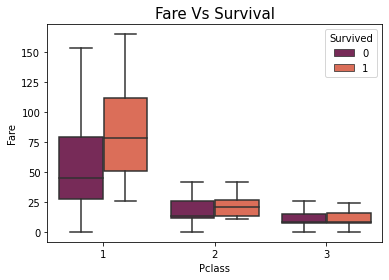

In [370]:
sns.boxplot(x='Pclass', y='Fare', data=df_train, showfliers=False, hue='Survived', palette='rocket')
plt.title('Fare vs Survival'.title(), fontsize=15);

#Passengers with higher fares were more likely to survive. For Class 3 passengers, median fare values for both survived and deceased passengers were the same which strongly suggests that preference was given to class 1 and 2 passengers

# **Relationship between Age and Survival**

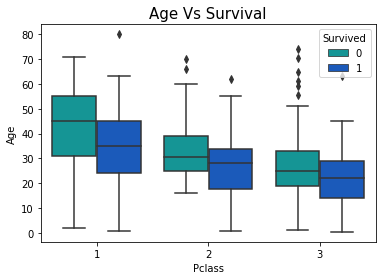

In [371]:
sns.boxplot(x='Pclass', y='Age', data=df_train, hue='Survived', showfliers=True, palette="winter_r")
plt.title('Age vs Survival'.title(), fontsize=15);

* Age of passengers in class 1 is more dispersed than those in remaining classes.
* Median age of passengers also varies ascendingly from class 3 to class 1.
* For all classes, median age of deseased passengers is greater than survived passenger

# Feature Engineering

In [372]:
data = df_train.copy()

In [373]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have two columns SibSp (Siblings and Spouse) and Parch(Parents and Children) in the dataset. These columns if combined forms the strength of the family of a passenger. let's create a new column Family representing the strength of the passengers' families.

In [374]:
data['Family']= data['SibSp'] + data['Parch']
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


Let's also add another column indicating whether a passenger is traveling 'alone' or in 'group'. If the value in 'Family' is 0 then we append 'alone' otherwise, we will append 'group'.

As we have seen from the EDA, passengers who paid lesser were more likely to lose their lives. We will also add column "middle_class" in which we will append 1 if their fare is between 0 to 30 USD else we will append 0.

In [375]:
data['middle_class']=data['Fare'].apply(lambda x: 1 if (x>=0) and (x<=30) else 0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,middle_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [376]:
data.corr()["Survived"].sort_values(ascending=False)

Survived        1.000000
Fare            0.257307
Parch           0.081629
Family          0.016639
PassengerId    -0.005007
SibSp          -0.035322
Age            -0.077221
middle_class   -0.242191
Pclass         -0.338481
Name: Survived, dtype: float64

* travelling_alone attribute shows stronger relationship than Parch, SibSp and Family.
* The relation of middle_class is almost equal in magnitude to Fare but it is inversely related to the target variable
* We will therefore cosider two added attributes middle_class and tavelling_alone for training our model

# Data Preperation for Model

In [377]:
# Seperating features and labels
data=df_train.drop("Survived", axis=1)
labels= df_train["Survived"]

In [378]:
titanic = data.copy()

In [379]:
titanic.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True )
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


# Missing Values

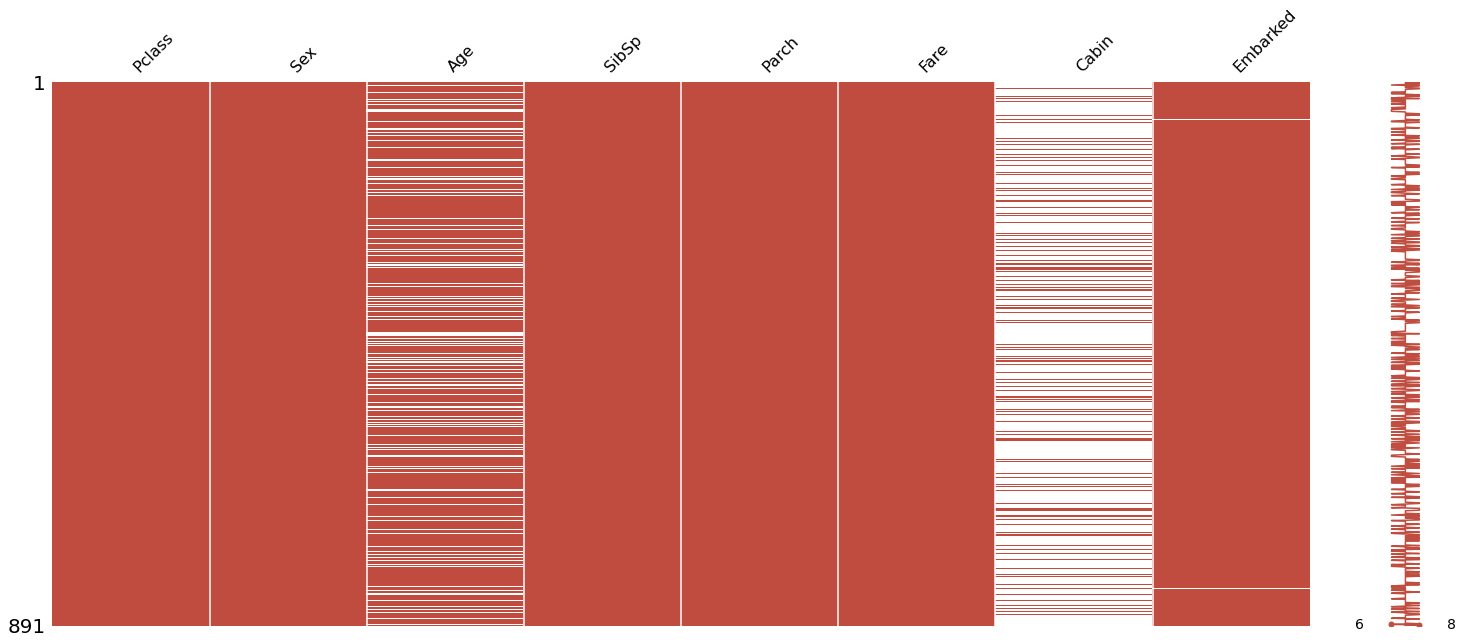

In [380]:
# heatmap for complete dataset to check missing values
msno.matrix(titanic,color=(0.75, 0.3, 0.25));

In [381]:
titanic.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [382]:
# getting percentage of missing values 
titanic.isna().mean()*100

Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

* Out of 891 records, there are 177 values are missing from the Age column which is 19% of the total entries. As it is still not significantly high, we can replace these values imputation technique.
* Critically, around 77% of Cabin data is missing. Dropping rows for these values will adversely affect our dataset and analysis.
* In addition, 2 entries are also unavailable in Embarked column.

# Cabin Column

Since 77% of cabin entries are missing, it will not make sense to replace these values. So we will completely drop the cabin column

In [383]:
titanic.drop(columns=['Cabin'], inplace=True)

# Embarked Column

In [384]:
# first seperating numberical and categorical columns
titanic_num= titanic[["Pclass", "Age", "SibSp", "Parch", "Fare"]]
titanic_cat = titanic[["Sex", "Embarked"]]

Only 2 entries are missing from the Embarked column. We will replace missing values with mode, i.e. port S

In [385]:
df_mode = titanic_cat.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
df_mode.iloc[:, 1:] = mode_imputer.fit_transform(df_mode.iloc[:, 1:])

In [386]:
df_mode.isna().sum()

Sex         0
Embarked    0
dtype: int64

In [387]:
# mean imputation
df_mean = titanic_num.copy()
mean_imputer = SimpleImputer(strategy = "mean")
df_mean.iloc[:,:] = mean_imputer.fit_transform(df_mean)

In [388]:
# median imputation
df_median =titanic_num.copy()
median_imputer = SimpleImputer(strategy = "median")
df_median.iloc[:,:] = median_imputer.fit_transform(df_median)

In [389]:
# KNN imputation
df_knn = titanic_num.copy()
knn_imputer = KNNImputer()
df_knn.iloc[:,:]= knn_imputer.fit_transform(df_knn)

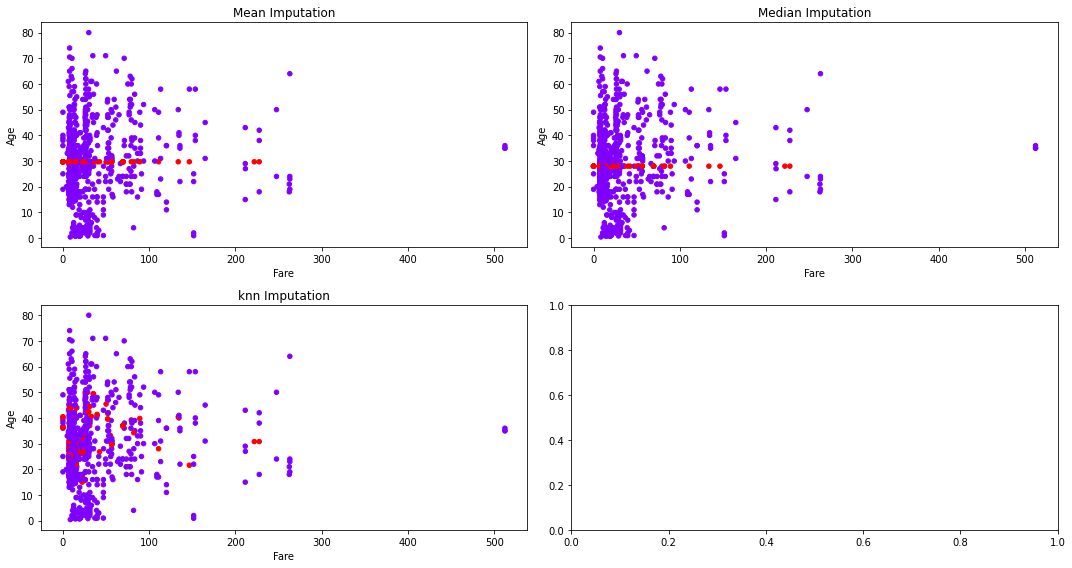

In [390]:
# let's analyse all above imputation results visually
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,8))

nullity = titanic["Age"].isna()
imputations = {"Mean Imputation": df_mean,
               "Median Imputation": df_median,
               "knn Imputation": df_knn
             }

for ax, key in zip(ax.flatten(), imputations):
    
    imputations[key].plot(x = "Fare", y = "Age", kind="scatter", 
                             ax=ax, c=nullity, cmap="rainbow", title=key, colorbar=None)
    

    plt.tight_layout();


* The graphs are plotted with Fare values on x-axis and Age on y-axis. Imputed values are represented by red dots.
* 
* Mean and Median imputation techniques fill constant values so, we see the imputed missing values along the straight horizontal line
* As KNN and MICE Imputation techniques are distance based, values are imputed based on nearest distance to the other observations. Hence, they give results close to the original data.
* Before we select the imputation method, lets also have a look at the Age distribution. Ideally our manual imputation should not alter the original distribution.

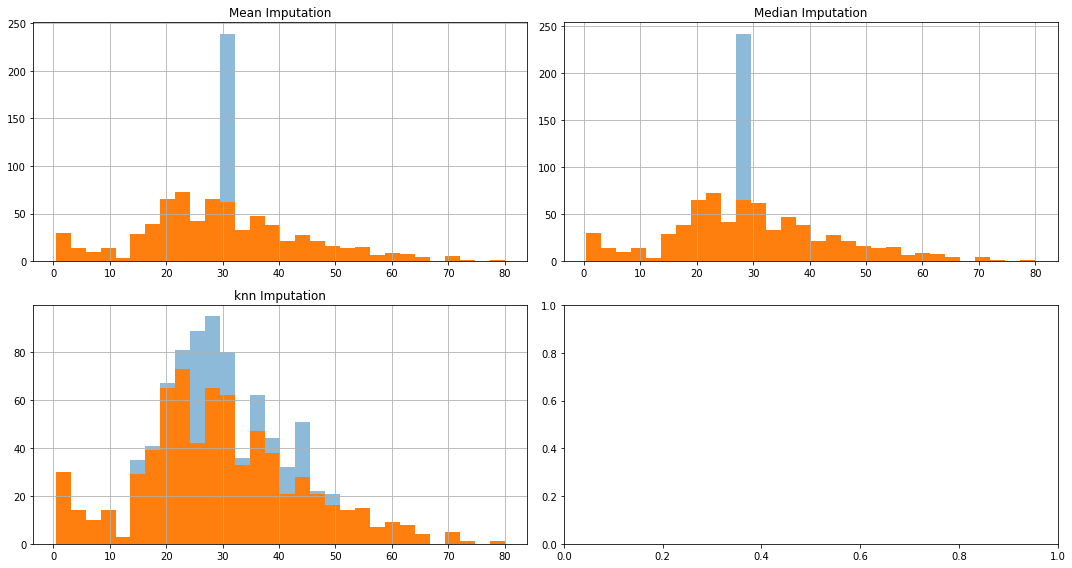

In [391]:
# Checking the effect of imputation on the original distribution
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,8))

imputations = {"Mean Imputation": df_mean,
               "Median Imputation": df_median,
               "knn Imputation": df_knn,
             }

for ax, key in zip(ax.flatten(), imputations):
    imputations[key].hist("Age", bins=30, ax=ax, alpha=0.5)
    titanic.hist("Age",bins=30, ax=ax)
    ax.set_title(key)
    plt.tight_layout()

* Orange - Old Distribution

* Blue - New Distribution

* Mean, Median and even MICE imputation alter the distribution. The scale of the distibution is significantly changing as imputed values are clustered around certain age.
* On the other hand, KNN is maintaining the original distribution. Since we have imputed the values, the new distribution (in blue) is appeared to be shadowing the original distribution.
* Therefore, we will select the KNN Imputation for replacing the missing values

In [392]:
titanic_num = df_knn.copy()

# Custom Transformer

In feature engineering section, we have constructed 3 new combined attributes i.e Family, travelling_alone, and middle_class. From the pearson's correlation, we came to know that travelling_alone and middle class have significant relation with the target variable. So, in this section, we will create our custom class by adding sklearn's BaseEstimator and TransformerMixin as base-class so that we can still use the set_params() and get_params() methods to hypertune our model.

In [393]:
titanic_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500


In [394]:
sibch_index, parch_index, fare_index = 2,3,4

class CombineedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_travelling_alone=True, add_middle_class=True):
        self.add_travelling_alone=add_travelling_alone
        self.add_middle_class= add_middle_class

    def fit(self, X):
        return self 

    def transform(self, X, y=None):
        family = X[:, sibch_index] +X[:, parch_index]
        family = family
        
        travelling_alone=[]
        for val in family:
            if val==0:
                travelling_alone.append(1)
            else:
                travelling_alone.append(0)

        middle_class = []
        for fare_val in X[:, fare_index]:
            if (fare_val >=0) and (fare_val<=30):
                middle_class.append(1)
            else:
                middle_class.append(0)

        if (self.add_travelling_alone) & (self.add_middle_class): 
            return np.c_[X, travelling_alone, middle_class]

        elif (self.add_middle_class) & (~self.add_travelling_alone): 
            return np.c_[X, middle_class]

        elif (~self.add_middle_class) & (self.add_travelling_alone):
            return np.c_[X, travelling_alone]

        else:
            return X

In [395]:
attr_adder= CombineedAttributesAdder(add_travelling_alone=True, add_middle_class=True)

In [396]:
titanic_extra_attrbs= attr_adder.transform(titanic_num.values)

As we have seen from the EDA, passengers who paid lesser were more likely to lose their lives. We will also add column "middle_class" in which we will append 1 if their fare is between 0 to 30 USD else we will append 0.pd.DataFrame(titanic_extra_attrbs)

* In our dataset, we have 2 categorical columns. Since machine learning models work with numeric data only, we have convert these categorical columns to numberic. To do so, we will use One Hot Encoding technique as the order in the categorical values is not important. Also, for distance based algorithms and for regularization, scaling of the data is very important. As we have numeric columns on different scales, we will apply StandardScaler to scale the data.

* Importantly, instead of doing all these processing operations seperately, we will create Pipeline which would make our life very easy. Lets jump to it then!

# Pipeline

In [397]:
numeric_pipeline = Pipeline([
    ('num_imputer', KNNImputer()),
    ('attr_adder', CombineedAttributesAdder(add_middle_class=True, add_travelling_alone=True))
])

In [398]:
categorical_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder())
])

In [399]:
pd.DataFrame(preprocessed_titanic_scaled)

NameError: name 'preprocessed_titanic_scaled' is not defined

In [ ]:
preprocessed_titanic = full_pipeline.fit_transform(titanic)

In [ ]:
scaler = StandardScaler()
preprocessed_titanic_scaled= scaler.fit_transform(preprocessed_titanic)

In [ ]:
full_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, list(titanic_num)),
    ('cat', categorical_pipeline, list(titanic_cat)),
])

# Model Creation

In [ ]:
X_train = preprocessed_titanic_scaled.copy()
y_train = labels

# Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
LogisticRegression()

In [ ]:
def display_results (test, pred):
    print("confusion matrix is:")
    print(confusion_matrix(test, pred))
    print('======================================================') 
    print("Accuracy score is:", accuracy_score(test, pred))  
    print('======================================================') 
    print("Precision is : ", precision_score(test, pred))
    print('======================================================') 
    print("Recall is : ", recall_score(test, pred))
    print('======================================================') 
    print("F1 score is : ", f1_score(test, pred))
    print('======================================================') 
    print("Classification report is:")
    print(classification_report(test, pred))

In [ ]:
y_train_pred = lr.predict(X_train)
acc_lr =accuracy_score(y_train, y_train_pred)
f1_lr =f1_score(y_train, y_train_pred)

In [ ]:
display_results(y_train, y_train_pred)

# KNN Classifier
add Codeadd Markdown
While using KNN classifier, the first challenge comes as we have to select the optimum value of K i.e number of neighbors. As seen above, we have plotted K against the error rate. If we select very low value of K, it will overfit the model and viceversa. We will use GridSearchCV() to find the optimum value for K

In [ ]:
error_rate = []
accuracy = []

# Will take some time
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_pred_knn1 = knn.predict(X_train)
    error_rate.append(np.mean(y_train_pred_knn1 != y_train))
    acc= accuracy_score(y_train, y_train_pred_knn1)
    accuracy.append(acc)

# Lets plot the k-value and error rate

fig, ax1 = plt.subplots(figsize = (6,6))
ax1.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='Erro rate')
ax1.set_xlabel('K')
ax1.set_ylabel('Error Rate')
plt.legend()

ax2 = ax1.twinx()

ax2.plot(range(1,10), accuracy, color='green',marker='o', label='Accuracy')
ax2.set_ylabel('Accuracy score')
plt.legend()
plt.show()

In [ ]:
KNN1 = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN1, {'n_neighbors':range(15)}, scoring='accuracy', n_jobs=-1, verbose=1, cv=3)
knn_cv.fit(X_train, y_train)
best_params_knn = knn_cv.best_params_
print(f"Best paramters: {best_params_knn})")

In [ ]:
KNN = KNeighborsClassifier(list(best_params_knn.values())[0])

In [ ]:
KNN.fit(X_train,y_train)

In [ ]:
KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_train_pred_knn = KNN.predict(X_train)

In [ ]:
acc_knn =accuracy_score(y_train, y_train_pred_knn)
f1_knn =f1_score(y_train, y_train_pred_knn)

In [ ]:
display_results(y_train, y_train_pred_knn)

# Support Vector machine

In [ ]:
svc = SVC()

In [ ]:
params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C':[float(x) for x in (range(30))],
    'decision_function_shape':["ovo", "ovr"] 
}

svc_cv = GridSearchCV(svc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
svc_cv.fit(X_train, y_train)
best_params_svc=svc_cv.best_params_
print("best_params: ", best_params_svc)

In [ ]:
Fitting 3 folds for each of 180 candidates, totalling 540 fits
best_params:  {'C': 2.0, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

In [ ]:
svc_best_prams = SVC(C=list(best_params_svc.values())[0], 
                    decision_function_shape=list(best_params_svc.values())[1], 
                    kernel=list(best_params_svc.values())[2])
svc_best_prams.fit(X_train, y_train)

In [ ]:
SVC(C=2.0, decision_function_shape='ovo')

In [ ]:
y_train_pred_svc = svc_best_prams.predict(X_train)

In [ ]:
acc_svc =accuracy_score(y_train, y_train_pred_svc)
f1_svc =f1_score(y_train, y_train_pred_svc)

In [ ]:
display_results(y_train, y_train_pred_svc)

# Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))}

In [ ]:
tree_cv = GridSearchCV(decision_tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

In [ ]:
Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})

In [ ]:
decision_tree_best_params = DecisionTreeClassifier(criterion= list(best_params.values())[0], 
                                                    max_depth=list(best_params.values())[1], 
                                                    min_samples_leaf= list(best_params.values())[2], 
                                                    min_samples_split = list(best_params.values())[3], 
                                                    splitter=list(best_params.values())[4])

In [ ]:
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       splitter='random')

In [ ]:
decision_tree_best_params.fit(X_train, y_train)

In [ ]:
acc_tree =accuracy_score(y_train, y_train_pred_tree)
f1_tree =f1_score(y_train, y_train_pred_tree)

In [ ]:
display_results(y_train, y_train_pred_tree)

# Random Forest

I have created following code to hypertune the random forest classifier. It takes lot of time to execute. So I have put it in markdown and trained the model with the optimum values directly

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=20)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]

max_depth.append(None)

min_samples_split = [2, 5, 10,15, 20]

min_samples_leaf = [1, 2, 4, 6, 8,10]

bootstrap = [True, False]

dictionary for hyperparameters

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)

rf_best_params = rf_cv.best_params_

print(f"Best paramters: {rf_best_params})")

In [ ]:
rf_clf_best_params = RandomForestClassifier(n_estimators=863, 
                                            min_samples_split=15, 
                                            min_samples_leaf=1, 
                                            max_features='auto', 
                                            max_depth=20, 
                                            bootstrap=True)

In [ ]:
rf_clf_best_params.fit(X_train, y_train)

In [ ]:
RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=863)

In [ ]:
y_train_pred_rf = rf_clf_best_params.predict(X_train)

In [ ]:
RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=863)


In [ ]:
acc_rf =accuracy_score(y_train, y_train_pred_rf)
f1_rf =f1_score(y_train, y_train_pred_rf)

In [ ]:
display_results(y_train, y_train_pred_rf)